# U.S. Medical Insurance Costs

### 1. Importing and Observing the Data

In [261]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [262]:
with open('insurance.csv', 'r') as insurance_csv:
    insurance = csv.DictReader(insurance_csv)
    # for row in insurance:
    #     print(row)

In [263]:
raw_data = pd.read_csv('insurance.csv')
display(raw_data.head(10))

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#### Observations:
- Region is separated int o 4 quarters of the continental US: NE, SE, SW and NW.
- People with a greater BMI and age seem to pay significantly more.

## 2. Scoping the Project:
  What I would like to investigate:
  - What are the biggest factors in higher healthcare charges?
  - What role do region, BMI, smoking, parenthood and age play in healthcare costs.
  #### Project goals:
  1. Isolate the variables of region, BMI, smoking, parenthood and age.

## 3. Exploring the data (looking for patterns)

In [264]:
smokers = raw_data[raw_data.smoker == 'yes'].sort_values(by='bmi').reset_index(drop=True)
display(smokers.head())
non_smokers = raw_data[raw_data.smoker == 'no'].sort_values(by='bmi').reset_index(drop=True)
display(non_smokers)
regions = raw_data.sort_values(by='region').reset_index(drop=True)
display(regions.head())
parents = raw_data[raw_data.children > 0]
parents_ordered_AGE = parents.sort_values(by='age', ascending=False).reset_index(drop=True) 
display(parents_ordered_AGE.head())

,age,sex,bmi,children,smoker,region,charges
0,26,female,17.195,2,yes,northeast,14455.64405
1,18,male,17.290,2,yes,northeast,12829.45510
2,32,female,17.765,2,yes,northwest,32734.18630
3,27,female,17.955,2,yes,northeast,15006.57945
4,39,female,18.300,5,yes,southwest,19023.26000


,age,sex,bmi,children,smoker,region,charges
0,18,male,15.960,0,no,northeast,1694.79640
1,21,female,16.815,1,no,northeast,3167.45585
2,38,male,16.815,2,no,northeast,6640.54485
3,37,female,17.290,2,no,northeast,6877.98010
4,28,female,17.290,0,no,northeast,3732.62510
...,...,...,...,...,...,...,...
1059,52,male,47.740,1,no,southeast,9748.91060
1060,46,female,48.070,2,no,northeast,9432.92530
1061,58,male,49.060,0,no,southeast,11381.32540
1062,23,male,50.380,1,no,southeast,2438.05520


,age,sex,bmi,children,smoker,region,charges
0,62,male,32.015,0,yes,northeast,45710.20785
1,32,male,37.335,1,no,northeast,4667.60765
2,53,male,30.495,0,no,northeast,10072.05505
3,54,male,32.775,0,no,northeast,10435.06525
4,52,male,33.250,0,no,northeast,9722.76950


,age,sex,bmi,children,smoker,region,charges
0,64,female,33.80,1,yes,southwest,47928.03000
1,64,male,39.16,1,no,southeast,14418.28040
2,64,male,24.70,1,no,northwest,30166.61817
3,64,female,31.30,2,yes,southwest,47291.05500
4,64,male,36.96,2,yes,southeast,49577.66240


Average Cost per region:

In [265]:
all_ne = raw_data[raw_data.region == 'northeast']
avg_cost_ne = all_ne['charges'].mean()
print("Average charges for Northeast: " + "$" + str(round(avg_cost_ne, 2)))
all_se = raw_data[raw_data.region == 'southeast']
avg_cost_se = all_se['charges'].mean()
print("Average charges for Southeast: " + "$" + str(round(avg_cost_se, 2)))
all_sw = raw_data[raw_data.region == 'southwest']
avg_cost_sw = all_sw['charges'].mean()
print("Average charges for Southwest: " + "$" + str(round(avg_cost_sw, 2)))
all_nw = raw_data[raw_data.region == 'northwest']
avg_cost_nw = all_nw['charges'].mean()
print("Average charges for Northwest: " + "$" + str(round(avg_cost_nw, 2)))
print("No significant difference between regions.")

Average charges for Northeast: $13406.38
Average charges for Southeast: $14735.41
Average charges for Southwest: $12346.94
Average charges for Northwest: $12417.58
No significant difference between regions.


Average age for people with at least 1 child:

In [266]:
parents_avg_age = parents['age'].mean()
print("Average age of parents of at aleast one child: " + str(round(parents_avg_age)) + " years old")

Average age of parents of at aleast one child: 40 years old


Prices for men vs. Women:

In [267]:
men_avg_cost = raw_data[raw_data.sex == 'male'].charges.mean()
women_avg_cost = raw_data[raw_data.sex == 'female'].charges.mean()
print("Average cost for men: " + "$" + str(round(men_avg_cost, 2)))
print("Average cost for women: " + "$" + str(round(women_avg_cost, 2)))
if max(men_avg_cost, women_avg_cost) == men_avg_cost:
    print("On average, men paid " + "$" + str(round((men_avg_cost - women_avg_cost), 2)) + " more than women.")
else:
    print("On average, women paid " + "$" + str(round((women_avg_cost - men_avg_cost), 2)) + " more than men.")

Average cost for men: $13956.75
Average cost for women: $12569.58
On average, men paid $1387.17 more than women.


Average cost per number of children:

In [268]:
avg_cost_per_num_children = parents.groupby('children')['charges'].mean().reset_index()
display(round(avg_cost_per_num_children, 2))

,children,charges
0,1,12731.17
1,2,15073.56
2,3,15355.32
3,4,13850.66
4,5,8786.04


Average BMI per region:

In [269]:
avg_bmi_ne = all_ne['bmi'].mean()
print("Average bmi for Northeast: "+ str(round(avg_bmi_ne, 2)))
avg_bmi_se = all_se['bmi'].mean()
print("Average bmi for Southeast: "+ str(round(avg_bmi_se, 2)))
avg_bmi_sw = all_sw['bmi'].mean()
print("Average bmi for Southwest: "+ str(round(avg_bmi_sw, 2)))
avg_bmi_nw = all_nw['bmi'].mean()
print("Average bmi for Northwest: "+ str(round(avg_bmi_nw, 2)))
print("No significant difference in bmi between regions.")

Average bmi for Northeast: 29.17
Average bmi for Southeast: 33.36
Average bmi for Southwest: 30.6
Average bmi for Northwest: 29.2
No significant difference in bmi between regions.


Average cost for smokers vs non-smokers with a BMI over 29.9%:

In [270]:
avg_cost_high_bmi_smokers = smokers[smokers['bmi'] > 29.999].charges.mean()
print("The average cost for smokers with a BMI above 29.9% is " + "$" + str(round(avg_cost_high_bmi_smokers, 2)))

avg_cost_high_bmi_non_smokers = non_smokers[non_smokers['bmi'] > 29.999].charges.mean()
print("The average cost for non-smokers with a BMI above 29.9% is " + "$" + str(round(avg_cost_high_bmi_non_smokers, 2)))
diference_high_bmi_smokers_vs_non = avg_cost_high_bmi_smokers - avg_cost_high_bmi_non_smokers
print("On average, high bmi smokers paid " + "$" + str(round((diference_high_bmi_smokers_vs_non), 2)) + " more than non-smokers.")

The average cost for smokers with a BMI above 29.9% is $41557.99
The average cost for non-smokers with a BMI above 29.9% is $8842.69
On average, high bmi smokers paid $32715.3 more than non-smokers.


Charting BMI and healthcare charges for smokers:

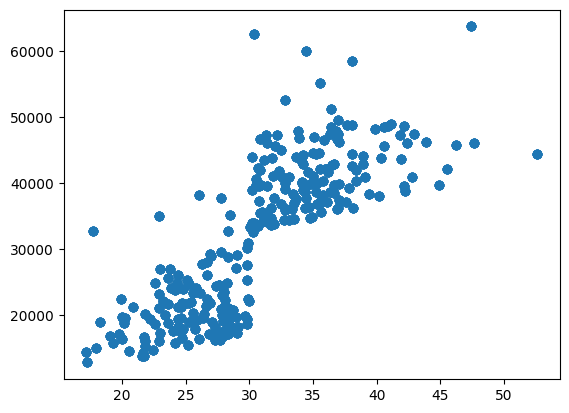

In [271]:
x_values_1 = [smokers['bmi'] for plot in smokers]
y_values_1 = [smokers['charges'] for plot in smokers]

plt.scatter(x_values_1, y_values_1)
plt.show()

Charting BMI and healthcare charges for non-smokers:

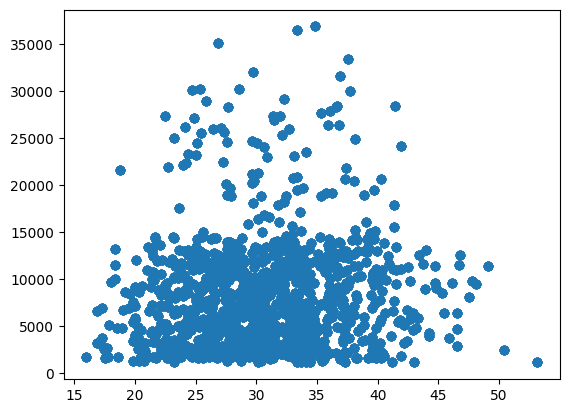

In [272]:
x_values_2 = [non_smokers['bmi'] for plot in non_smokers]
y_values_2 = [non_smokers['charges'] for plot in non_smokers]

plt.scatter(x_values_2, y_values_2)
plt.show()

## 4. Conclusions
#### Obesity and Smoking
An adult with a BMI of over 29.9% is considered "obese" according to the United States Center for Disease Control ([follow link to www.cdc.gov](https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=Adult%20Body%20Mass%20Index%20or%20BMI&text=Or%20determine%20your%20BMI%20by,falls%20within%20the%20overweight%20range)).
If an individual in this category would like to lower their heathcare costs and save an average of $32,715.30, they should consider quitting smoking.

When anylizing the charges for non-smokers, their BMI does not seem to play a significant factor even above the overweight/obesity threshhold. For smokers, however, as soon as they cross the threshold of 29.999%, their charges increase significantly. In the first chart we can see the aformentioned average increase of $32,715.30 where the highest costs for obese non-smokers become the lowest costs for obese smokers.